In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

## label_math_ele로 데이터 전처리하여 저장

In [2]:
import pandas as pd

# CSV 파일 읽기
label_math = pd.read_csv(r'C:\Users\user\Desktop\중간 프로젝트\label.csv')

# from_g와 to_g 열 생성
label_math['from_g'] = label_math['from_semester'].apply(lambda x: x.split('-')[0])
label_math['to_g'] = label_math['to_semester'].apply(lambda x: x.split('-')[0])

# 필터링 조건 적용: 고등 포함 / 중등만 포함한 경우 제외
label_math_ele = label_math[
    ~(
        ((label_math['from_g'] == '고등') | (label_math['to_g'] == '고등')) |
        ((label_math['from_g'] == '중등') & (label_math['to_g'] == '중등'))
    )
]

# 치환을 위한 딕셔너리 생성
replacement_dict = {
    '중등-중1-1학기': '중등-중7-1학기',
    '중등-중2-2학기': '중등-중8-2학기',
    '중등-중1-2학기': '중등-중7-2학기',
    '중등-중2-1학기': '중등-중8-1학기',
    '중등-중3-1학기': '중등-중9-1학기',
    '중등-중3-2학기': '중등-중9-2학기'
}

# 'from_g'가 '중등'인 행들의 'from_semester' 값을 딕셔너리 대로 치환
label_math_ele.loc[label_math_ele['from_g'] == '중등', 'from_semester'] = label_math_ele['from_semester'].replace(replacement_dict)


In [3]:
label_math_ele

,from_id,from_name,from_semester,from_description,from_chapter_id,from_chapter_name,from_achievement_id,from_achievement_name,to_id,to_name,to_semester,to_description,to_chapter_id,to_chapter_name,to_achievement_id,to_achievement_name,from_g,to_g
48,116,거듭제곱,중등-중7-1학기,같은 수나 같은 문자를 거듭해서 곱한 것을 간단히 나타낸 것\n이때 거듭해서 곱한 ...,434.0,수와연산 > 소인수분해 > 소인수분해,32.0,"소인수분해의 뜻을 알고, 자연수를 소인수분해 할 수 있다.",7944,곱셈식,초등-초2-1학기,2의 4배를 2×4라고 씁니다.\n2×4는 2 곱하기 4라고 읽습니다.\n2+2+2...,106.0,곱셈 > 곱셈식을 알아볼까요,52.0,"곱셈구구를 이해하고, 한자릿수의 곱셈을 할 수 있다.",중등,초등
55,2615,덧셈과 뺄셈이 섞여 있는 식의 계산,초등-초5-1학기,* 덧셈과 뺄셈이 섞여 있는 식은 앞에서부터 차례로 계산합니다.\n* 덧셈과 뺄셈이...,294.0,자연수의 혼합 계산 > 덧셈과 뺄셈이 섞여 있는 식을 계산해 볼까요,65.0,"덧셈, 뺄셈, 곱셈, 나눗셈의 혼합 계산에서 계산하는 순서를 알고, 혼합 계산을 할...",7933,세 수의 계산,초등-초2-1학기,세 수의 계산은 앞에서부터 두 수식 차례로 계산합니다.,93.0,덧셈과 뺄셈 > 세 수의 계산을 해 볼까요,49.0,두 자릿수의 범위에서 세 수의 덧셈과 뺄셈을 할 수 있다.,초등,초등
56,2616,곱셈과 나눗셈이 섞여 있는 식의 계산,초등-초5-1학기,* 곱셈과 나눗셈이 섞여 있는 식은 앞에서부터 차례로 계산합니다.\n* 곱셈과 나눗...,295.0,자연수의 혼합 계산 > 곱셈과 나눗셈이 섞여 있는 식을 계산해 볼까요,65.0,"덧셈, 뺄셈, 곱셈, 나눗셈의 혼합 계산에서 계산하는 순서를 알고, 혼합 계산을 할...",2068,$(세자릿수)\times(두자릿수)$,초등-초4-1학기,1. 세 자릿수와 두 자릿수의 일의 자릿수를 곱한다.\n2. 세 자릿수와 두 자릿수...,236.0,곱셈과 나눗셈 > 세 자릿수에 두 자릿수를 곱해 볼까요,57.0,(두 자릿수)×(두 자릿수)와 (세 자릿수)×(두 자릿수)의 계산 원리를 이해하고 ...,초등,초등
57,2616,곱셈과 나눗셈이 섞여 있는 식의 계산,초등-초5-1학기,* 곱셈과 나눗셈이 섞여 있는 식은 앞에서부터 차례로 계산합니다.\n* 곱셈과 나눗...,295.0,자연수의 혼합 계산 > 곱셈과 나눗셈이 섞여 있는 식을 계산해 볼까요,65.0,"덧셈, 뺄셈, 곱셈, 나눗셈의 혼합 계산에서 계산하는 순서를 알고, 혼합 계산을 할...",2073,몫이 두 자릿수고 나누어떨어지는 $(세자릿수)\div(두자릿수)$,초등-초4-1학기,"세 자릿수 중 왼쪽 두 자릿수부터 먼저 나누고, 남은 나머지와 일의 자릿수를 더해서...",240.0,곱셈과 나눗셈 > 세 자릿수를 두 자릿수로 나누어 볼까요 (1),62.0,나누는 수가 두 자릿수인 나눗셈의 계산 원리를 이해하고 그 계산을 할 수 있다.,초등,초등
58,2617,"덧셈, 뺄셈, 곱셈이 섞여 있는 식의 계산",초등-초5-1학기,"* 덧셈, 뺄셈, 곱셈이 섞여 있는 식은 곱셈을 먼저 계산하고, ( )가 있으면...",296.0,"자연수의 혼합 계산 > 덧셈, 뺄셈, 곱셈이 섞여 있는 식을 계산해 볼까요",65.0,"덧셈, 뺄셈, 곱셈, 나눗셈의 혼합 계산에서 계산하는 순서를 알고, 혼합 계산을 할...",2615,덧셈과 뺄셈이 섞여 있는 식의 계산,초등-초5-1학기,* 덧셈과 뺄셈이 섞여 있는 식은 앞에서부터 차례로 계산합니다.\n* 덧셈과 뺄셈이...,294.0,자연수의 혼합 계산 > 덧셈과 뺄셈이 섞여 있는 식을 계산해 볼까요,65.0,"덧셈, 뺄셈, 곱셈, 나눗셈의 혼합 계산에서 계산하는 순서를 알고, 혼합 계산을 할...",초등,초등
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,11269,천만 단위까지의 수 알아보기,초등-초4-1학기,"10000이 1365개인 수- 쓰기: 13560000또는 1356만, 읽기: 천삼백...",223.0,"큰 수 > 십만, 백만, 천만을 알아볼까요",11.0,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,7268,다섯 자릿수,초등-초4-1학기,"1.다섯 자릿수 알아보기\n10000이 2개, 1000이 3개, 100이 8개, 1...",222.0,큰 수 > 다섯 자릿수를 알아볼까요,10.0,10000 이상의 큰 수를 읽고 쓸 수 있다.,초등,초등
3442,11270,천억 단위까지의 수 알아보기,초등-초4-1학기,1억이 7365개인 수\n- 쓰기: 736500000000또는 7365억\n- 읽기...,224.0,큰 수 > 억과 조를 알아볼까요,11.0,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,11269,천만 단위까지의 수 알아보기,초등-초4-1학기,"10000이 1365개인 수- 쓰기: 13560000또는 1356만, 읽기: 천삼백...",223.0,"큰 수 > 십만, 백만, 천만을 알아볼까요",11.0,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,초등,초등
3443,11271,천조 단위까지의 수 알아보기,초등-초4-1학기,1조가 2761개인 수\n- 쓰기: 2761000000000000 또는 2761조\...,224.0,큰 수 > 억과 조를 알아볼까요,11.0,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,11270,천억 단위까지의 수 알아보기,초등-초4-1학기,1억이 7365개인 수\n- 쓰기: 736500000000또는 7365억\n- 읽기...,224.0,큰 수 > 억과 조를 알아볼까요,11.0,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.,초등,초등
3444,8481,각도의 합과 차,초등-초4-1학기,"각도의 합과 차는 자연수의 덧셈, 뺄셈과 같은 방법으로 계산합니다.",232.0,각도 > 각도의 합과 차는 얼마일까요,NaN,NaN,7310,받아 올림이 세 번 있는 $(세자릿수)+(세자릿수)$,초등-초3-1학기,"1. 각 자리의 숫자를 맞추어 적습니다.\n2. 일의 자리, 십의 자리, 백의 자리...",148.0,덧셈과 뺄셈 > 덧셈을 해 볼까요 (3),53.0,받아 올림이 있는 (세 자릿수)+(세 자릿수)의 계산 원리를 이해하고 그 계산을 할...,초등,초등


## 네트워크 그래프

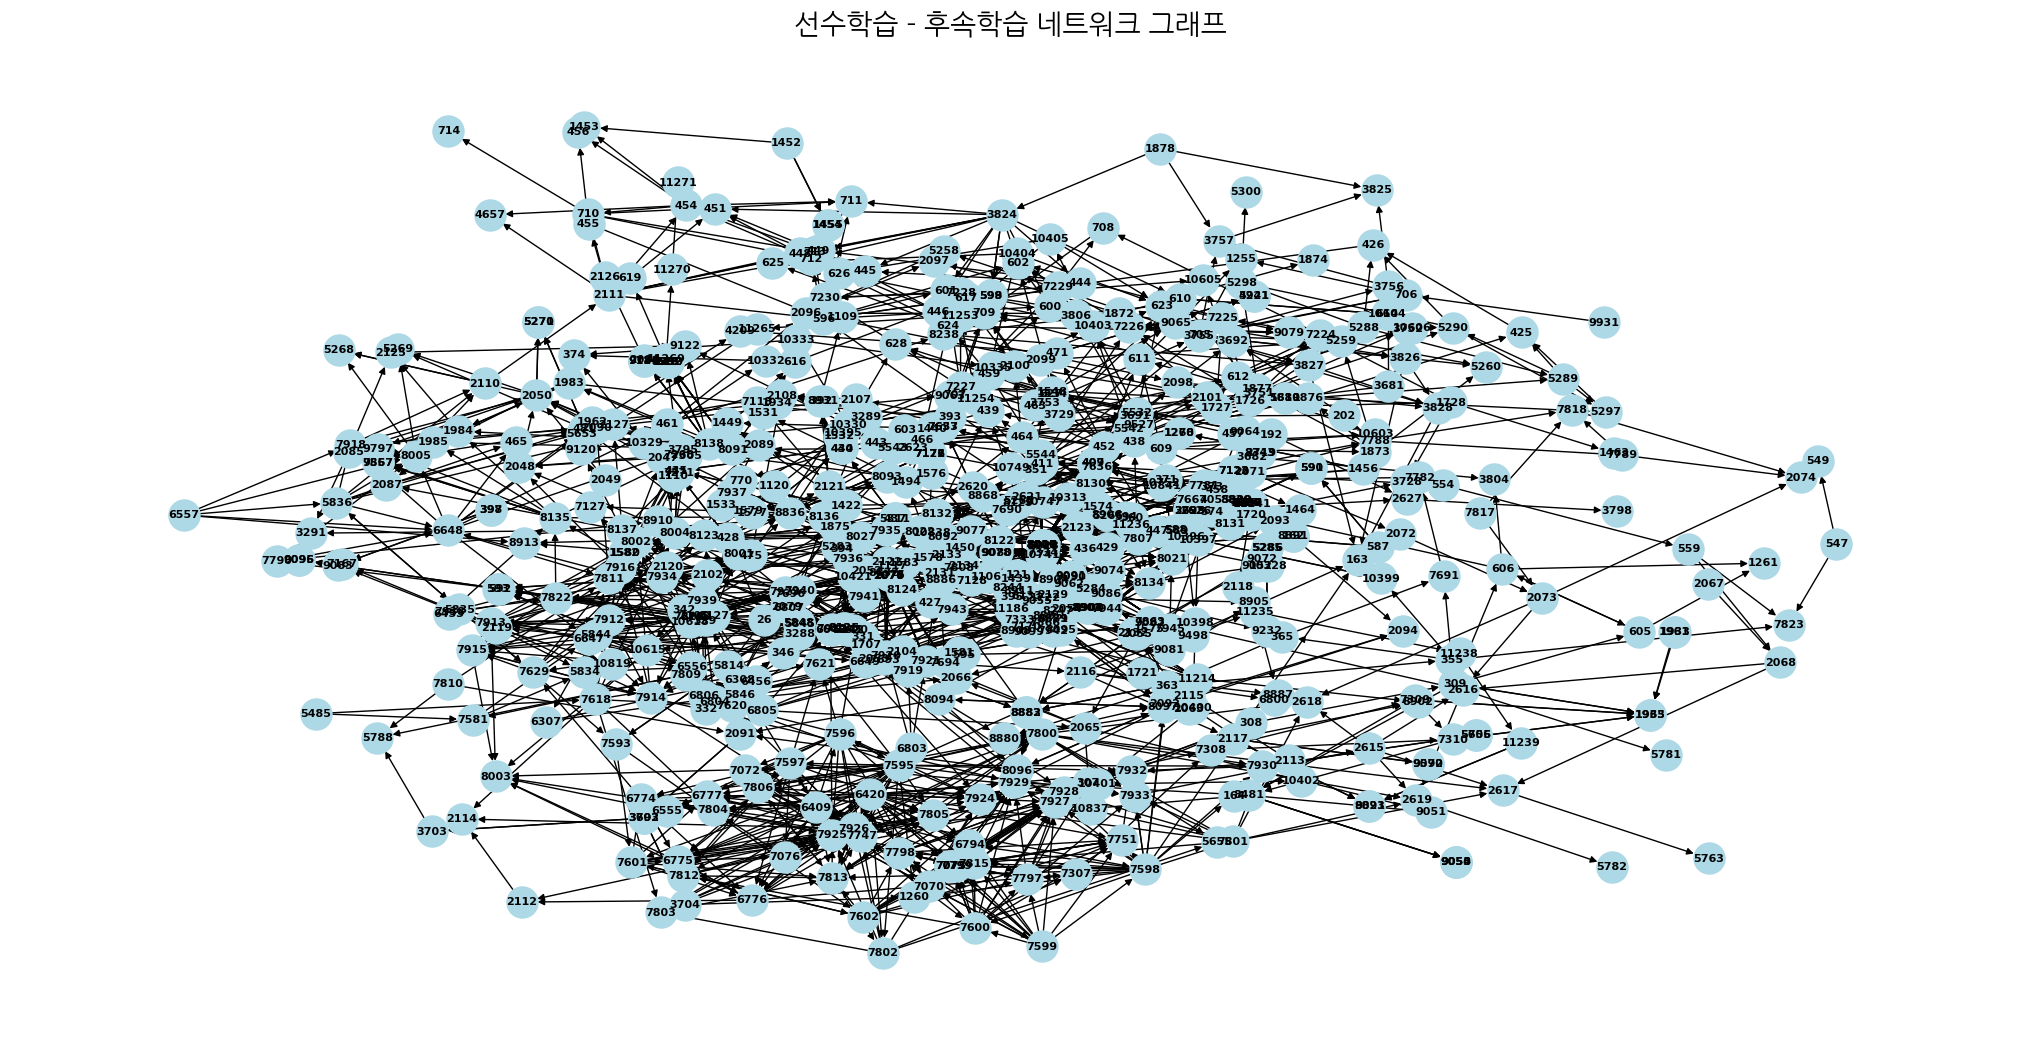

In [13]:
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')[0]
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 네트워크 그래프 생성
G = nx.DiGraph()

# from_id와 to_id를 이용해 엣지 추가
for _, row in label_math_ele.iterrows():
    G.add_edge(row['to_id'], row['from_id'])

# 그래프 그리기
plt.figure(figsize=(20, 10))

# pos를 다양한 레이아웃으로 변경할 수 있음
pos = nx.kamada_kawai_layout(G)  # 노드 위치를 정하는 다른 레이아웃
# pos = nx.spring_layout(G, k=0.15, iterations=20)  # spring_layout 조정 가능

# 노드 크기와 텍스트 크기를 줄여서 가독성 향상
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold', arrowsize=10)

# 그래프 제목 추가
plt.title('선수학습 - 후속학습 네트워크 그래프', fontsize=20)

# 그래프 보여주기
plt.show()

## 본개념-선수학습-후속학습 코드

In [11]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict

# NaN 값을 빈 문자열로 대체
label_math_ele['from_chapter_name'].fillna('', inplace=True)
label_math_ele['to_chapter_name'].fillna('', inplace=True)

def extract_semester(semester_str):
    if pd.isna(semester_str):
        return ''
    match = re.search(r'(\d+)-(\d+)', semester_str)
    return (int(match.group(1)), int(match.group(2))) if match else (None, None)

def get_unique_id_name_pairs(df):
    to_id_name = dict(zip(df['to_id'], df['to_chapter_name']))
    from_id_name = dict(zip(df['from_id'], df['from_chapter_name']))
    
    all_ids = set(to_id_name.keys()).union(set(from_id_name.keys()))
    unique_id_name_pairs = {}
    unique_id_semesters = {}
    
    for id_ in all_ids:
        to_name = to_id_name.get(id_, '')
        from_name = from_id_name.get(id_, '')
        
        if to_name and from_name:
            unique_id_name_pairs[id_] = f'{to_name} / {from_name}'
        elif to_name:
            unique_id_name_pairs[id_] = to_name
        elif from_name:
            unique_id_name_pairs[id_] = from_name
        
        from_semester = df[df['from_id'] == id_]['from_semester'].values
        to_semester = df[df['to_id'] == id_]['to_semester'].values
        
        if len(from_semester) > 0:
            unique_id_semesters[id_] = extract_semester(from_semester[0])
        elif len(to_semester) > 0:
            unique_id_semesters[id_] = extract_semester(to_semester[0])
        else:
            unique_id_semesters[id_] = (None, None)
    
    return unique_id_name_pairs, unique_id_semesters

# 본개념과 ID-이름 쌍, 학기 정보 가져오기
unique_id_name_pairs, unique_id_semesters = get_unique_id_name_pairs(label_math_ele)

# 본개념 데이터프레임 생성
concepts_all = pd.DataFrame({
    'ID': list(unique_id_name_pairs.keys()),
    'Name': list(unique_id_name_pairs.values()),
    '학년-학기': [unique_id_semesters.get(id_, (None, None)) for id_ in unique_id_name_pairs.keys()]
})

predecessors = defaultdict(list)
successors = defaultdict(list)

to_chapter_names = dict(zip(label_math_ele['to_id'], label_math_ele['to_chapter_name']))
from_chapter_names = dict(zip(label_math_ele['from_id'], label_math_ele['from_chapter_name']))

for _, row in label_math_ele.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    predecessors[from_id].append(to_id)
    successors[to_id].append(from_id)

def get_concepts(node_id):
    main_concept = {
        '본개념': node_id,
        '본개념_Chapter_Name': unique_id_name_pairs.get(node_id, '정보 없음'),
        '학년-학기': unique_id_semesters.get(node_id, (None, None))
    }
    
    # 선수학습과 후속학습을 학기 정보에 따라 정렬
    main_concept['선수학습'] = sorted(predecessors.get(node_id, []), key=lambda x: unique_id_semesters.get(x, (0, 0)), reverse=True)
    main_concept['후속학습'] = sorted(successors.get(node_id, []), key=lambda x: unique_id_semesters.get(x, (0, 0)))
    
    return main_concept

def get_concepts_df(node_id):
    concepts = get_concepts(node_id)
    
    main_concept_df = pd.DataFrame([{
        '본개념_ID': concepts['본개념'],
        '본개념_Chapter_Name': concepts['본개념_Chapter_Name'],
        '학년-학기': f"{concepts['학년-학기'][0]}-{concepts['학년-학기'][1]}"
    }])
    
    predecessors_df = pd.DataFrame({
        '선수학습_ID': concepts['선수학습'],
        '선수학습_Chapter_Name': [unique_id_name_pairs.get(id, '정보 없음') for id in concepts['선수학습']],
        '학년-학기': [f"{unique_id_semesters.get(id, (None, None))[0]}-{unique_id_semesters.get(id, (None, None))[1]}" for id in concepts['선수학습']]
    })
    
    successors_df = pd.DataFrame({
        '후속학습_ID': concepts['후속학습'],
        '후속학습_Chapter_Name': [unique_id_name_pairs.get(id, '정보 없음') for id in concepts['후속학습']],
        '학년-학기': [f"{unique_id_semesters.get(id, (None, None))[0]}-{unique_id_semesters.get(id, (None, None))[1]}" for id in concepts['후속학습']]
    })
    
    return main_concept_df, predecessors_df, successors_df

# 사용자 입력을 통해 노드 ID 받기
node_id = int(input("노드 ID를 입력해주세요: "))

# 데이터프레임으로 변환하여 출력
main_concept_df, predecessors_df, successors_df = get_concepts_df(node_id)

print("\n본개념 정보:")
print(main_concept_df)

print("\n선수학습 정보:")
print(predecessors_df)

print("\n후속학습 정보:")
print(successors_df)


C:\Users\user\AppData\Local\Temp\ipykernel_12396\1352224721.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_math_ele['from_chapter_name'].fillna('', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12396\1352224721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_math_ele['to_chapter_name'].fillna('', inplace=True)



본개념 정보:
   본개념_ID                                 본개념_Chapter_Name 학년-학기
0    7597  덧셈과 뺄셈 > 덧셈을 해 볼까요 (2) / 덧셈과 뺄셈 > 덧셈을 해 볼까요 (2)   1-1

선수학습 정보:
   선수학습_ID                                  선수학습_Chapter_Name 학년-학기
0     6409  덧셈과 뺄셈 > 모으기와 가르기를 해 볼까요 (1) / 덧셈과 뺄셈 > 모으기와 가...   1-1
1     7595  덧셈과 뺄셈 > 더하기는 어떻게 나타낼까요 / 덧셈과 뺄셈 > 더하기는 어떻게 나타낼까요   1-1

후속학습 정보:
    후속학습_ID                                  후속학습_Chapter_Name 학년-학기
0      7620          50까지의 수 > 십몇을 알아볼까요 / 50까지의 수 > 십몇을 알아볼까요   1-1
1      7621  50까지의 수 > 10개씩 묶어 세어 볼까요 / 50까지의 수 > 10개씩 묶어 세...   1-1
2      6555  50까지의 수 > 50까지의 수를 세어 볼까요 / 50까지의 수 > 50까지의 수를...   1-1
3      6774  덧셈과 뺄셈(1) > 덧셈을 해 볼까요 (1) / 덧셈과 뺄셈(1) > 덧셈을 해 ...   1-2
4      6775  덧셈과 뺄셈(1) > 덧셈을 해 볼까요 (2) / 덧셈과 뺄셈(1) > 덧셈을 해 ...   1-2
5      6776  덧셈과 뺄셈(1) > 덧셈을 해 볼까요 (3) / 덧셈과 뺄셈(1) > 덧셈을 해 ...   1-2
6      7812  덧셈과 뺄셈(3) > 10을 이용하여 모으기와 가르기를 해 볼까요 / 덧셈과 뺄셈(...   1-2
7      7076  덧셈과 뺄셈(1) > 덧셈을 해 볼까요 (3) / 덧셈과 뺄셈(1) > 덧셈을 해 ...   1-2
8      7805  덧셈과

## 레이블 파일에 있던 모든 본개념 정리한 데이터프레임

In [15]:
import pandas as pd
import numpy as np
import re

# 예시 데이터프레임 생성

# NaN 값을 빈 문자열로 대체
label_math_ele['from_chapter_name'].fillna('', inplace=True)
label_math_ele['to_chapter_name'].fillna('', inplace=True)

def extract_semester(semester_str):
    if pd.isna(semester_str):
        return ''
    match = re.search(r'(\d+)-(\d+)', semester_str)
    return f"{match.group(1)}-{match.group(2)}" if match else ''

def get_unique_id_name_pairs(df):
    # 'to_id'와 'from_id' 각각의 ID와 이름 쌍을 딕셔너리로 만듭니다
    to_id_name = dict(zip(df['to_id'], df['to_chapter_name']))
    from_id_name = dict(zip(df['from_id'], df['from_chapter_name']))
    
    # ID와 이름 쌍을 모두 가져옵니다
    all_ids = set(to_id_name.keys()).union(set(from_id_name.keys()))
    unique_id_name_pairs = {}
    unique_id_semesters = {}
    
    for id_ in all_ids:
        to_name = to_id_name.get(id_, '')
        from_name = from_id_name.get(id_, '')
        
        # 두 이름이 모두 있는 경우, 둘을 결합합니다
        if to_name and from_name:
            unique_id_name_pairs[id_] = f'{to_name} / {from_name}'
        elif to_name:
            unique_id_name_pairs[id_] = to_name
        elif from_name:
            unique_id_name_pairs[id_] = from_name
        
        # 학기 정보를 추가합니다
        from_semester = df[df['from_id'] == id_]['from_semester'].values
        to_semester = df[df['to_id'] == id_]['to_semester'].values
        
        if len(from_semester) > 0:
            unique_id_semesters[id_] = extract_semester(from_semester[0])
        elif len(to_semester) > 0:
            unique_id_semesters[id_] = extract_semester(to_semester[0])
        else:
            unique_id_semesters[id_] = ''
    
    return unique_id_name_pairs, unique_id_semesters

# 본개념과 ID-이름 쌍, 학기 정보 가져오기
unique_id_name_pairs, unique_id_semesters = get_unique_id_name_pairs(label_math_ele)

# 본개념 데이터프레임 생성
concepts_all = pd.DataFrame({
    'ID': list(unique_id_name_pairs.keys()),
    'Name': list(unique_id_name_pairs.values()),
    '학년-학기': [unique_id_semesters.get(id_, '') for id_ in unique_id_name_pairs.keys()]
})

# 출력
print("본개념 정보:")
concepts_all

본개념 정보:


C:\Users\user\AppData\Local\Temp\ipykernel_17584\3804230046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_math_ele['from_chapter_name'].fillna('', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17584\3804230046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_math_ele['to_chapter_name'].fillna('', inplace=True)


,ID,Name,학년-학기
0,2048,큰 수 > 억과 조를 알아볼까요 / 큰 수 > 억과 조를 알아볼까요,4-1
1,2049,큰 수 > 뛰어 세기를 해 볼까요,4-1
2,2050,큰 수 > 수의 크기를 비교해 볼까요 / 큰 수 > 수의 크기를 비교해 볼까요,4-1
3,2052,각도 > 어느 각이 더 클까요,4-1
4,2053,각도 > 각의 크기는 얼마일까요,4-1
...,...,...,...
637,8137,표와 그래프 > 그래프로 나타내어 볼까요 / 표와 그래프 > 그래프로 나타내어 볼까요,2-2
638,8138,표와 그래프 > 표와 그래프의 내용을 알아볼까요 / 표와 그래프 > 표와 그래프의 ...,2-2
639,8136,표와 그래프 > 표와 그래프로 나타내어 볼까요 / 표와 그래프 > 표와 그래프로 나...,2-2
640,8134,시각과 시간 > 달력을 알아볼까요,2-2


## 2022 교육과정 계열화 파일

In [5]:
education_2022 = pd.read_excel(r"C:\Users\user\Desktop\중간 프로젝트\education_2022_계열화최종.xlsx")

In [6]:
education_2022

,ID,Name,영역명,내용요소,계열화,grade,Unnamed: 6
0,2048,큰 수 > 억과 조를 알아볼까요 / 큰 수 > 억과 조를 알아볼까요,수와 연산,다섯 자리 이상의 수,A-4-7,4-1,7.0
1,2049,큰 수 > 뛰어 세기를 해 볼까요,수와 연산,다섯 자리 이상의 수,A-4-9,4-1,9.0
2,2050,큰 수 > 수의 크기를 비교해 볼까요 / 큰 수 > 수의 크기를 비교해 볼까요,수와 연산,다섯 자리 이상의 수,A-4-10,4-1,10.0
3,2052,각도 > 어느 각이 더 클까요,도형과 측정(도형),도형의 기초,C-3-3,4-1,11.0
4,2053,각도 > 각의 크기는 얼마일까요,도형과 측정(측정),각도( ° ),D-8-1,4-1,12.0
...,...,...,...,...,...,...,...
637,10741,제곱근과 실수 > 제곱근과 실수 > 무리수와 실수,수와 연산,제곱근과 실수,NaN,9-1,NaN
638,5141,제곱근과 실수 > 제곱근과 실수 > 무리수와 실수,수와 연산,제곱근과 실수,NaN,9-1,NaN
639,5142,제곱근과 실수 > 제곱근과 실수 > 실수의 대소 관계,수와 연산,제곱근과 실수,NaN,9-1,NaN
640,5921,제곱근과 실수 > 제곱근과 실수 > 무리수와 실수,수와 연산,제곱근과 실수,NaN,9-1,NaN


#### 2022 교육과정 파일로 네트워크 그래프

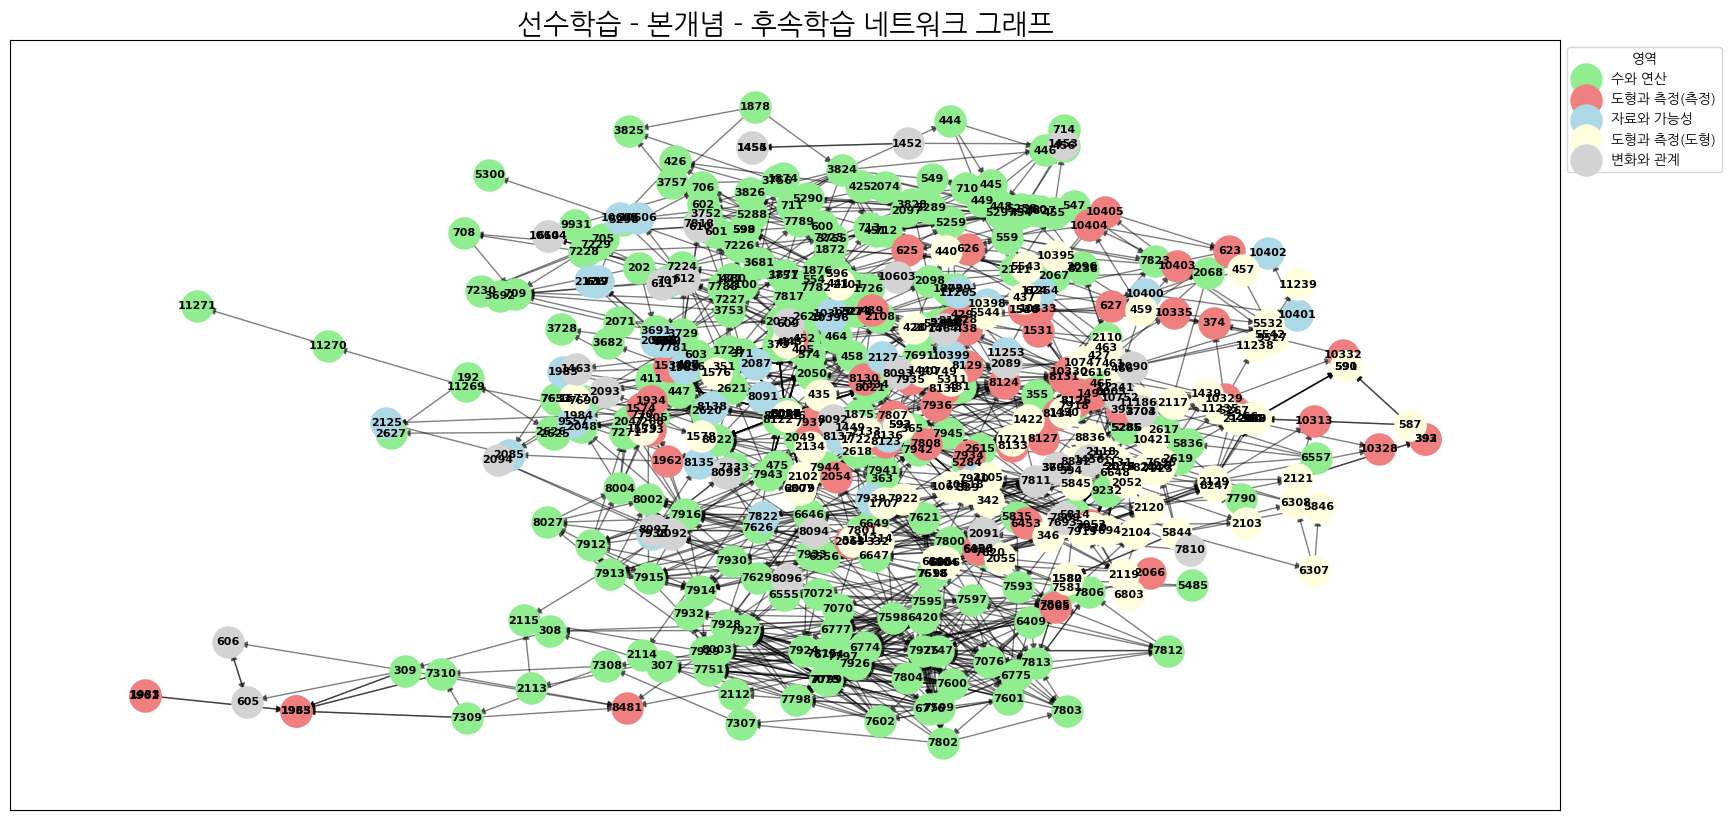

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm

# 폰트 설정
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')[0]
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 불러오기
label_math = pd.read_csv(r'C:\Users\user\Desktop\중간 프로젝트\label.csv')
label_math['grade'] = label_math['from_semester'].apply(lambda x: x.split('-')[0])
label_math_ele = label_math[label_math['grade'] == '초등']

edu_2022 = pd.read_csv(r"C:\Users\user\Desktop\중간 프로젝트\2022개정교육과정_id연결.csv", encoding='utf-16', delimiter='\t')

# 네트워크 그래프 생성
G = nx.DiGraph()

# from_id와 to_id를 이용해 엣지 추가
for _, row in label_math_ele.iterrows():
    G.add_edge(row['to_id'], row['from_id'])

# 영역명 데이터를 노드에 추가
node_areas = education_2022.set_index('ID')['영역명'].to_dict()

# 노드에 'area' 속성 추가 (기존 노드 속성에 병합)
for node in G.nodes():
    G.nodes[node]['area'] = node_areas.get(node, 'Unknown')  # 기본값으로 'Unknown'을 사용

# 노드 영역별 색상 매핑
area_colors = {
    '수와 연산': 'lightgreen',
    '도형과 측정(측정)': 'lightcoral',
    '자료와 가능성': 'lightblue',
    '도형과 측정(도형)': 'lightyellow',
    '변화와 관계': 'lightgrey'
}

# 'Unknown' 영역 제외
filtered_nodes = [node for node, data in G.nodes(data=True) if data.get('area') != 'Unknown']
G_filtered = G.subgraph(filtered_nodes).copy()

# 노드 색상 결정
node_colors = [area_colors.get(G_filtered.nodes[node].get('area', 'Unknown')) for node in G_filtered.nodes()]

# 노드 위치를 정하는 다른 레이아웃
pos = nx.kamada_kawai_layout(G_filtered)

# 그래프 그리기
plt.figure(figsize=(20, 10))

# 각 영역별 노드를 별도로 그리기
for area, color in area_colors.items():
    nodes_in_area = [node for node, data in G_filtered.nodes(data=True) if data.get('area') == area]
    if nodes_in_area:  # 노드가 있는 경우에만 그리기
        nx.draw_networkx_nodes(G_filtered, pos, nodelist=nodes_in_area, node_color=color, label=area, node_size=500)

# 엣지 그리기
nx.draw_networkx_edges(G_filtered, pos, alpha=0.5)

# 레이블 그리기
nx.draw_networkx_labels(G_filtered, pos, font_size=8, font_weight='bold')

# 그래프 제목 추가
plt.title('선수학습 - 본개념 - 후속학습 네트워크 그래프', fontsize=20)

# 범례 추가
plt.legend(scatterpoints=1, loc='upper left', bbox_to_anchor=(1, 1), title="영역")

# 그래프 보여주기
plt.show()
